<a href="https://colab.research.google.com/github/chavgova/My-AI/blob/master/emotion_recognition_06.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

IMPORT

In [ ]:
#this is the copy of another projecct and ill make changes to see how i can make it better 
import librosa
import librosa.display
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from matplotlib.pyplot import specgram
from matplotlib.axis import Axis
import keras
from keras.preprocessing import sequence
from keras.models import Sequential
from keras.layers import Dense, Embedding
from keras.layers import LSTM
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.utils import to_categorical
from keras.layers import Input, Flatten, Dropout, Activation
from keras.layers import Conv1D, MaxPooling1D, AveragePooling1D
from keras.models import Model
from keras.callbacks import ModelCheckpoint
from sklearn.metrics import confusion_matrix
from keras import regularizers
import os

In [ ]:
from google.colab import drive
import os

path = '/content/drive/My Drive/My_AI/RawData'

mylist = []
mylist = os.listdir(path)

#print(mylist)	



In [ ]:
print(mylist[50])

YAF_rot_fear.wav


In [ ]:
print(mylist[18][6:-16])

LABLES

In [ ]:
import re

feeling_list=[]
dataset = ''

for item in mylist:
    file_label = item[6:-16]
    try:
      file_label = int(file_label)
      dataset = 'RAVDESS'
    except:
      file_label = re.split('_|\.', item)[2]
      dataset = 'TESS'

    if dataset == 'RAVDESS':
      if int(item[18:-4])%2==0:  #female
          if file_label == 1:
            feeling_list.append('female_neutral')
          elif file_label == 2:
            feeling_list.append('female_calm')
          elif file_label == 3:
            feeling_list.append('female_happy')
          elif file_label == 4:
            feeling_list.append('female_sad')
          elif file_label == 5:
            feeling_list.append('female_angry')
          elif file_label == 6:
            feeling_list.append('female_fearful')
          elif file_label == 7:
            feeling_list.append('female_disgust')
          elif file_label == 8:
            feeling_list.append('female_surprised')
      else:
          if file_label== 1:
            feeling_list.append('male_neutral')
          elif file_label == 2:
            feeling_list.append('male_calm')
          elif file_label == 3:
            feeling_list.append('male_happy')
          elif file_label == 4:
            feeling_list.append('male_sad')
          elif file_label == 5:
            feeling_list.append('male_angry')
          elif file_label == 6:
            feeling_list.append('male_fearful')
          elif file_label == 7:
            feeling_list.append('male_disgust')
          elif file_label == 8:
            feeling_list.append('male_surprised')

    elif dataset == 'TESS':
      if file_label == 'neutral': feeling_list.append('female_neutral')
      elif file_label == 'angry': feeling_list.append('female_angry')
      elif file_label == 'disgust': feeling_list.append('female_disgust')
      elif file_label == 'ps': feeling_list.append('female_surprised')
      elif file_label == 'happy': feeling_list.append('female_happy')
      elif file_label == 'sad': feeling_list.append('female_sad')
      elif file_label == 'fear': feeling_list.append('female_fearful')



In [ ]:
import pandas as pd

labels = pd.DataFrame(feeling_list)
labels[1600:1660]      #print

,0
1600,female_surprised
1601,female_sad
1602,female_fearful
1603,female_fearful
1604,female_angry
1605,female_angry
1606,female_neutral
1607,female_neutral
1608,female_surprised
1609,female_neutral


Getting the features of audio files using librosa

In [ ]:
import librosa
import numpy as np

def extract_feature(my_file, **kwargs):
    mfcc = kwargs.get("mfcc")
    chroma = kwargs.get("chroma")
    mel = kwargs.get("mel")
    contrast = kwargs.get("contrast")
    tonnetz = kwargs.get("tonnetz")
    X, sample_rate = librosa.core.load(my_file)
    if chroma or contrast:
        stft = np.abs(librosa.stft(X))
    result = np.array([])
    if mfcc:
        mfccs = np.mean(librosa.feature.mfcc(y=X, sr=sample_rate, n_mfcc=40).T, axis=0)
        result = np.hstack((result, mfccs))  # 40 values 
    if chroma:
        chroma = np.mean(librosa.feature.chroma_stft(S=stft, sr=sample_rate).T,axis=0)
        result = np.hstack((result, chroma))  # 12 values 
    if mel:
        mel = np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
        result = np.hstack((result, mel))  # 128 values 
    if contrast:
        contrast = np.mean(librosa.feature.spectral_contrast(S=stft, sr=sample_rate).T,axis=0)
        result = np.hstack((result, contrast)) # 7 values 
    if tonnetz:
        tonnetz = np.mean(librosa.feature.tonnetz(y=librosa.effects.harmonic(X), sr=sample_rate).T,axis=0)
        result = np.hstack((result, tonnetz)) # 6 values 

    return result

f = os.fspath('/content/drive/My Drive/My_AI/RawData/03-01-08-01-01-02-01.wav')
a = extract_feature(f, mel=True, mfcc=True, contrast=True, chroma=True, tonnetz=True)
print(a, a.shape)

[-6.84004989e+02  5.32450840e+01 -3.82405212e+00  1.08633848e+01
  6.45998657e+00 -1.76418794e+00 -6.69027890e+00 -5.71296504e+00
 -1.02703711e+01 -1.24663496e+00 -1.42016495e+00 -5.53884220e+00
 -7.63195972e-01 -4.26062887e+00 -5.46744871e+00  1.86795079e+00
 -6.22305035e+00 -2.08268366e+00 -3.65107353e-01 -7.48533222e-01
 -6.96590727e+00 -1.44718670e+00 -3.59923825e+00 -3.56393090e+00
 -2.77594965e+00 -2.98965773e+00 -3.82198522e+00 -1.49731349e+00
 -2.70504382e+00 -1.32901307e+00 -1.88366352e+00 -1.73925725e+00
 -2.15880931e+00 -1.87022926e+00 -3.57598030e+00 -1.49111468e+00
 -2.10047279e+00 -8.99386099e-01 -2.84401069e+00 -2.30541155e+00
  7.80550834e-01  8.00080035e-01  8.01224957e-01  7.54025271e-01
  6.85943634e-01  6.71676561e-01  7.43009431e-01  7.71004724e-01
  7.46792360e-01  7.60950897e-01  7.62073349e-01  7.73509293e-01
  5.42677068e-06  3.91708064e-05  1.58175380e-03  1.92751743e-02
  6.36823604e-02  3.66249441e-02  5.73856774e-03  6.86588743e-03
  2.90028191e-02  7.74857

In [ ]:
data_frame = pd.DataFrame(columns=['all_features'])
bookmark=0

#mylist = mylist[:100]
for index,y in enumerate(mylist):
      all_features_ndarray = extract_feature('/content/drive/My Drive/My_AI/RawData/'+ y, mel=True, mfcc=True, contrast=True, chroma=True, tonnetz=True)
      data_frame.loc[bookmark] = [all_features_ndarray]
      bookmark=bookmark+1
        
#df[:5]    #print 


In [ ]:
data_frame


,all_features
0,"[-316.3982820454405, 39.7822605437439, -19.189..."
1,"[-342.88055472969165, 45.95027168893386, -12.3..."
2,"[-419.17375831355355, 79.36795418715639, 4.317..."
3,"[-293.87641633233585, 22.448290415751732, -9.3..."
4,"[-367.20304493461066, 40.17211376308315, -2.72..."
...,...
4107,"[-614.8793810084532, 59.91064380697029, 9.4241..."
4108,"[-366.7528327066581, 28.327005527886197, -18.1..."
4109,"[-628.3971297013248, 51.9933647752744, -7.6679..."
4110,"[-542.8575844948675, 50.066011592353405, -23.3..."


In [ ]:
data_frame = pd.DataFrame(data_frame['all_features'].values.tolist())
data_frame[:10]

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192
0,-316.398282,39.782261,-19.189288,10.220406,-3.955771,-5.367594,-8.272648,-5.151310,-8.576905,6.269787,-18.821991,4.428211,-0.106290,1.069031,0.127908,-5.440494,-1.287617,8.693481,-3.554609,15.700572,10.750350,7.285267,2.611756,5.705450,-1.574549,7.675168,0.213019,1.292888,-0.059914,-0.239021,-3.433251,3.604023,-4.753794,3.056424,-1.128346,1.007652,-1.190492,1.005525,1.607905,3.564362,...,0.001503,0.001342,0.002295,0.002372,0.002861,0.006071,0.006472,0.008890,0.007342,0.005558,0.005838,0.005698,0.005810,0.005224,0.004468,0.006076,0.005546,0.006286,0.006116,0.011182,0.018300,0.012381,0.005446,0.009796,0.008335,0.003382,0.000305,13.868668,20.999650,21.803635,19.194679,20.722318,21.901160,32.323680,-0.003346,-0.014993,0.020096,-0.003074,-0.000737,0.012189
1,-342.880555,45.950272,-12.301437,9.037878,-17.194069,-13.218251,-8.020786,-17.228617,-14.822261,-2.137459,-10.392415,9.892669,-10.905327,10.679729,-1.748336,3.126162,8.133520,1.703298,-3.835112,2.226029,-3.639254,5.678473,-1.003672,2.825912,-0.287353,2.221059,3.942444,7.379460,3.065108,9.795497,3.641103,7.876033,6.162153,7.126329,2.823838,5.375054,-0.816559,5.629844,2.231022,2.599346,...,0.002129,0.001635,0.001341,0.000785,0.000476,0.000568,0.001456,0.001768,0.002265,0.002550,0.003186,0.004343,0.002630,0.002409,0.004420,0.007988,0.007283,0.005904,0.006900,0.006846,0.008745,0.006972,0.003461,0.003092,0.003775,0.002511,0.000264,17.622480,18.869340,22.381613,19.010813,20.511432,21.295596,31.370796,-0.006591,-0.008237,-0.013012,-0.001128,-0.000918,-0.002161
2,-419.173758,79.367954,4.317339,35.424460,-7.966875,-4.674928,-0.599713,-17.962315,-12.630474,-7.361007,-12.680626,0.716001,-8.898681,3.046107,-6.071597,-4.969251,5.618301,-5.994555,-6.884007,1.297542,-8.073998,1.653511,-2.665310,2.601730,-2.046081,0.588888,-2.019464,3.216928,4.282435,8.064075,-0.794268,5.343579,-0.834786,0.198284,0.655829,3.781555,5.973052,7.372418,6.851194,7.075016,...,0.000393,0.000156,0.000118,0.000213,0.000269,0.000675,0.000828,0.000593,0.000774,0.000674,0.000787,0.001000,0.001052,0.000936,0.001152,0.001685,0.002630,0.003414,0.003983,0.005403,0.007188,0.004412,0.001615,0.002020,0.003231,0.001068,0.000168,18.847273,20.424341,21.850558,17.300010,21.275250,21.865844,29.752038,-0.010095,-0.000362,-0.047308,-0.015524,-0.001998,-0.003304
3,-293.876416,22.448290,-9.335532,26.431156,-4.734249,2.973992,-2.389638,-10.468726,-2.792421,0.925244,-13.743108,8.317492,-8.206837,2.610541,0.372752,-2.467361,-0.495091,12.504432,2.665887,13.333836,6.096934,2.939573,-2.406452,4.838465,1.819071,9.418154,-0.115926,0.947575,-1.769516,3.020390,-4.262996,2.740926,-5.912998,-0.717437,-0.780768,3.394294,0.121856,5.221049,0.308147,2.509442,...,0.133340,0.131750,0.114145,0.108087,0.085247,0.071662,0.049761,0.042576,0.034288,0.023788,0.024551,0.025097,0.024018,0.028981,0.030698,0.035535,0.035312,0.031429,0.029649,0.039931,0.044069,0.031701,0.013745,0.018371,0.012888,0.005912,0.000552,13.557616,20.720947,21.244924,19.248067,21.323559,20.853838,31.759059,0.000611,-0.000084,-0.013852,-0.064953,0.006751,0.000230
4,-367.203045,40.172114,-2.722191,17.633493,-15.947783,-5.629244,0.581348,-18.207309,-2.655200,-3.220760,-18.233323,12.147264,-11.930273,5.846366,-1.782772,-4.524518,2.751071,0.070683,-5.328440,5.018463,-5.571851,-2.214062,-7.623350,-2.618450,-2.444535,-0.937296,-2.697148,4.923608,7.678478,14.626429,11.462202,15.358377,9.920862,7.825822,2.132594,4.316476,2.754338,7.616782,2.611640,0.899905,...,0.000616,0.000405,0.000610,0.000777,0.000929,0.002041,0.001509,0.001979,0.001734,0.002036,0.002950,0.004354,0.002887,0.003199,0.004200,0.007140,0.007721,0.006963,0.009832,0.018136,0.027777,0.011011,0.006270,0.011737,0.012987,0.008119,0.000792,18.718335,21.817464,23.389298

In [ ]:
data_frame_labels = pd.concat([data_frame,labels], axis=1)
data_frame_labels = data_frame_labels.rename(index=str, columns={"0": "label"})
data_frame_labels    #print

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,0
0,-316.398282,39.782261,-19.189288,10.220406,-3.955771,-5.367594,-8.272648,-5.151310,-8.576905,6.269787,-18.821991,4.428211,-0.106290,1.069031,0.127908,-5.440494,-1.287617,8.693481,-3.554609,15.700572,10.750350,7.285267,2.611756,5.705450,-1.574549,7.675168,0.213019,1.292888,-0.059914,-0.239021,-3.433251,3.604023,-4.753794,3.056424,-1.128346,1.007652,-1.190492,1.005525,1.607905,3.564362,...,0.001342,0.002295,0.002372,0.002861,0.006071,0.006472,0.008890,0.007342,0.005558,0.005838,0.005698,0.005810,0.005224,0.004468,0.006076,0.005546,0.006286,0.006116,0.011182,0.018300,0.012381,0.005446,0.009796,0.008335,0.003382,3.049260e-04,13.868668,20.999650,21.803635,19.194679,20.722318,21.901160,32.323680,-0.003346,-0.014993,0.020096,-0.003074,-0.000737,0.012189,female_fearful
1,-342.880555,45.950272,-12.301437,9.037878,-17.194069,-13.218251,-8.020786,-17.228617,-14.822261,-2.137459,-10.392415,9.892669,-10.905327,10.679729,-1.748336,3.126162,8.133520,1.703298,-3.835112,2.226029,-3.639254,5.678473,-1.003672,2.825912,-0.287353,2.221059,3.942444,7.379460,3.065108,9.795497,3.641103,7.876033,6.162153,7.126329,2.823838,5.375054,-0.816559,5.629844,2.231022,2.599346,...,0.001635,0.001341,0.000785,0.000476,0.000568,0.001456,0.001768,0.002265,0.002550,0.003186,0.004343,0.002630,0.002409,0.004420,0.007988,0.007283,0.005904,0.006900,0.006846,0.008745,0.006972,0.003461,0.003092,0.003775,0.002511,2.638007e-04,17.622480,18.869340,22.381613,19.010813,20.511432,21.295596,31.370796,-0.006591,-0.008237,-0.013012,-0.001128,-0.000918,-0.002161,female_surprised
2,-419.173758,79.367954,4.317339,35.424460,-7.966875,-4.674928,-0.599713,-17.962315,-12.630474,-7.361007,-12.680626,0.716001,-8.898681,3.046107,-6.071597,-4.969251,5.618301,-5.994555,-6.884007,1.297542,-8.073998,1.653511,-2.665310,2.601730,-2.046081,0.588888,-2.019464,3.216928,4.282435,8.064075,-0.794268,5.343579,-0.834786,0.198284,0.655829,3.781555,5.973052,7.372418,6.851194,7.075016,...,0.000156,0.000118,0.000213,0.000269,0.000675,0.000828,0.000593,0.000774,0.000674,0.000787,0.001000,0.001052,0.000936,0.001152,0.001685,0.002630,0.003414,0.003983,0.005403,0.007188,0.004412,0.001615,0.002020,0.003231,0.001068,1.677236e-04,18.847273,20.424341,21.850558,17.300010,21.275250,21.865844,29.752038,-0.010095,-0.000362,-0.047308,-0.015524,-0.001998,-0.003304,female_disgust
3,-293.876416,22.448290,-9.335532,26.431156,-4.734249,2.973992,-2.389638,-10.468726,-2.792421,0.925244,-13.743108,8.317492,-8.206837,2.610541,0.372752,-2.467361,-0.495091,12.504432,2.665887,13.333836,6.096934,2.939573,-2.406452,4.838465,1.819071,9.418154,-0.115926,0.947575,-1.769516,3.020390,-4.262996,2.740926,-5.912998,-0.717437,-0.780768,3.394294,0.121856,5.221049,0.308147,2.509442,...,0.131750,0.114145,0.108087,0.085247,0.071662,0.049761,0.042576,0.034288,0.023788,0.024551,0.025097,0.024018,0.028981,0.030698,0.035535,0.035312,0.031429,0.029649,0.039931,0.044069,0.031701,0.013745,0.018371,0.012888,0.005912,5.524261e-04,13.557616,20.720947,21.244924,19.248067,21.323559,20.853838,31.759059,0.000611,-0.000084,-0.013852,-0.064953,0.006751,0.000230,female_fearful
4,-367.203045,40.172114,-2.722191,17.633493,-15.947783,-5.629244,0.581348,-18.207309,-2.655200,-3.220760,-18.233323,12.147264,-11.930273,5.846366,-1.782772,-4.524518,2.751071,0.070683,-5.328440,5.018463,-5.571851,-2.214062,-7.623350,-2.618450,-2.444535,-0.937296,-2.697148,4.923608,7.678478,14.626429,11.462202,15.358377,9.920862,7.825822,2.132594,4.316476,2.754338,7.616782,2.611640,0.899905,...,0.000405,0.000610,0.000777,0.000929,0.002041,0.001509,0.001979,0.001734,0.002036,0.002950,0.004354,0.002887,0.003199,0.004200,0.007140,0.007721,0.006963,0.009832,0.018136,0.027777,0.011011,0.006270,0.011737,0.012987,0.008119,7.91837

In [ ]:
from sklearn.utils import shuffle
data_frame_labels = shuffle(data_frame_labels)
data_frame_labels
    #print 

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,0
254,-347.123835,44.043896,-11.613025,-1.458504,-26.913753,-2.782223,-2.000736,-16.642872,-9.094340,4.754935,-14.752887,8.938273,-5.039340,3.967994,1.147924,5.952595,7.461369,8.678352,-3.272249,4.543512,-3.142360,5.786297,-3.940040,-0.581490,-1.627573,-1.176990,2.078181,6.316171,3.876697,8.640462,4.551107,12.850754,1.967487,5.795148,3.107165,6.584020,4.643573,4.919477,1.238937,4.313566,...,0.002492,0.002914,0.005350,0.004654,0.009870,0.007394,0.006716,8.030971e-03,0.013359,0.010931,0.005557,0.003816,0.004451,0.003670,0.004279,0.003995,0.003615,0.004078,0.004929,0.005163,0.007304,0.003374,0.002268,0.001951,0.000774,8.364681e-05,18.326410,18.641605,23.228271,20.138121,19.845366,21.452116,31.865994,0.011819,0.003226,-0.013010,-0.032199,0.002439,-0.007595,female_surprised
3325,-535.328945,45.390007,-4.543281,12.642729,-2.628806,-8.795822,-4.211024,-19.576792,-6.761145,-2.436701,-5.024091,-6.022085,-1.580092,-2.681859,-5.754496,2.828435,-2.247282,-2.461608,2.210070,-5.114966,-3.524893,-0.474296,-6.819968,-1.655634,-7.543427,1.148709,0.160206,9.780802,9.897847,11.302230,7.593586,7.540145,6.076625,8.500964,4.426645,6.313315,-1.759157,1.282358,0.123881,2.685680,...,0.001782,0.002529,0.001972,0.001125,0.000564,0.000372,0.000596,1.156372e-03,0.001341,0.001694,0.001014,0.000743,0.000285,0.000307,0.000274,0.000344,0.000348,0.000277,0.000258,0.000226,0.000238,0.000282,0.000369,0.000571,0.000357,3.632027e-05,18.498566,18.917560,20.498559,17.576079,18.793048,20.357575,29.330328,-0.007616,0.014907,0.001415,-0.039922,0.002889,-0.004957,female_calm
3638,-665.670381,69.423096,4.290857,18.770670,17.390419,1.984931,8.672213,0.870290,-0.254155,6.153161,1.776646,7.658847,2.689833,2.550105,3.153737,0.864293,1.894546,-0.332683,2.699294,2.210963,-0.687629,2.422812,-0.545256,2.143111,-1.848296,3.640365,-2.544234,4.154845,-0.745587,2.918792,0.924665,1.457449,0.604105,1.725766,0.012183,2.148100,0.207754,1.019918,-0.529477,-0.476480,...,0.000018,0.000020,0.000026,0.000009,0.000008,0.000005,0.000005,5.325890e-06,0.000011,0.000010,0.000012,0.000012,0.000013,0.000007,0.000004,0.000006,0.000003,0.000003,0.000007,0.000010,0.000015,0.000017,0.000011,0.000008,0.000003,2.308536e-07,22.016423,13.838823,16.434785,15.002241,15.556546,17.612371,28.882514,-0.002985,0.053594,-0.097235,-0.003604,0.024305,0.024492,male_sad
3065,-573.288468,37.981320,-11.718485,3.391480,0.318904,-8.290125,-12.451872,-9.332021,-13.523524,-2.386335,-6.481959,-7.364832,-1.592987,-4.593503,-1.155889,-6.171527,-6.677599,-1.349691,-6.718495,-3.374737,-4.928774,-2.493015,-6.876822,-1.405842,-3.505999,3.407016,-0.122708,5.955931,1.577450,4.760310,3.938527,7.758215,8.279145,10.207527,8.081540,5.020375,1.413802,0.746741,-1.372959,1.625808,...,0.000506,0.000740,0.000649,0.000668,0.000634,0.000403,0.000510,8.481055e-04,0.000373,0.000270,0.000304,0.000198,0.000170,0.000115,0.000105,0.000154,0.000200,0.000188,0.000211,0.000240,0.000092,0.000155,0.000165,0.000108,0.000032,2.405190e-06,20.128578,17.255602,18.853983,17.085346,17.899063,17.559152,29.801758,0.001071,-0.006617,0.001983,0.060477,0.004244,0.003623,female_fearful
1486,-498.683555,70.199378,18.464460,15.800271,9.891025,6.594033,-11.792072,-12.610354,-15.110421,7.944897,-10.584569,1.246336,-1.710922,6.499586,-0.716409,0.495313,0.270695,5.620311,1.881555,-7.588851,5.190089,-2.920367,-3.657781,2.605250,-8.270365,1.985776,-1.585417,6.373835,-1.208807,8.022483,13.806012,12.177582,4.693194,10.576283,2.522865,5.117396,10.792843,16.940693,8.875963,11.287488,...,0.000401,0.000181,0.000036,0.000056,0.000082,0.000041,0.000043,1.576868e-04,0.000223,0.000130,0.000227,0.000433,0.000316,0.000151,0.000335,0.000222,0.000072,0.000168,0.000062,0.000016,0.000024,0.000023,0.000047,0.000048,0.000012,8

SAVE DATASET FEATURES AND LABELS 

In [ ]:
import pickle

with open('/content/drive/My Drive/My_AI/datasets(RAVDESS&TESS)_features&labels.pkl', 'wb') as f:
  pickle.dump(data_frame_labels, f)


LOAD DATASET FEATURES AND LABELS 

In [ ]:
import pickle

with open('/content/drive/My Drive/My_AI/datasets(RAVDESS&TESS)_features&labels.pkl', 'rb') as f:
  data_frame_labels = pickle.load(f)


Dividing the data into test and train

In [ ]:
data_frame_labels_set = np.random.rand(len(data_frame_labels)) < 0.8
train = data_frame_labels[data_frame_labels_set]
test = data_frame_labels[~data_frame_labels_set]

In [ ]:
train[250:260]

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,0
1171,-365.527774,23.681685,-8.076274,11.964686,-12.537244,-5.947483,-12.462949,-10.051110,-5.901083,4.255431,-10.929927,12.585423,-4.680558,10.490467,1.375430,5.992140,5.950694,4.016505,-3.074015,3.416479,-1.964670,1.580498,-2.021672,3.433349,-3.586243,4.210561,0.208535,4.103815,1.837308,4.929398,2.558533,6.592446,1.164872,5.644581,2.294147,6.994839,1.524060,6.641698,2.352367,2.676047,...,0.004378,0.005368,0.003909,0.002484,0.001625,0.001609,0.001472,0.001908,0.002309,0.002747,0.002731,0.001864,0.001574,0.002903,0.003959,0.003168,0.002381,0.002249,0.004289,0.004855,0.002984,0.001261,0.001480,0.001445,0.001322,1.530685e-04,17.503698,16.198754,19.841164,17.394569,18.197498,20.000331,32.363690,0.001629,-0.001344,-0.000404,-0.021943,0.005899,0.005933,female_surprised
2926,-791.183078,35.558339,-6.655087,11.706779,-4.255474,-7.225716,-9.490301,-10.712251,-5.216913,-4.657977,-3.565161,-6.936546,-3.529171,-3.059522,-6.516932,-3.367136,-5.994840,-2.477107,-4.274209,-4.667532,-2.895097,-2.749783,-4.915572,-0.710321,-3.438331,-1.624353,-1.985765,-0.551943,-0.389388,2.371968,-0.049844,4.400003,2.887396,7.161452,5.767548,6.456413,3.169581,2.087672,-0.418462,2.361771,...,0.000012,0.000009,0.000009,0.000008,0.000006,0.000005,0.000005,0.000004,0.000004,0.000003,0.000003,0.000010,0.000007,0.000012,0.000004,0.000003,0.000004,0.000005,0.000006,0.000003,0.000004,0.000004,0.000004,0.000003,0.000002,9.309435e-08,17.932850,16.525212,17.124579,15.661626,16.086508,16.296327,25.909899,0.004785,-0.001213,0.019620,-0.005405,-0.009054,-0.005930,female_calm
3605,-620.899875,63.586112,-0.968937,15.728518,14.572402,1.476216,2.210887,0.976040,-0.980556,2.137461,1.119620,4.497945,2.911193,1.902023,3.018885,2.237229,0.480924,-0.224256,1.643285,1.698532,-0.851324,1.734255,-0.767117,2.086202,-2.601585,2.638388,-2.915944,2.304702,-1.089980,2.740250,0.567329,1.096523,0.152536,0.261068,-0.797745,0.466472,-0.960740,0.044729,-1.257758,-0.879231,...,0.000172,0.000119,0.000098,0.000102,0.000139,0.000194,0.000116,0.000046,0.000131,0.000117,0.000097,0.000093,0.000083,0.000079,0.000051,0.000048,0.000030,0.000026,0.000033,0.000047,0.000061,0.000083,0.000067,0.000056,0.000021,1.377828e-06,19.894710,13.507741,15.909898,14.631874,15.596758,17.004944,28.689012,-0.022178,0.030791,-0.026640,-0.075401,0.032463,0.005755,male_sad
740,-367.550874,52.640243,-2.901102,17.669356,-17.458414,-11.934331,-4.344245,-18.034388,-11.655155,-6.530196,-12.669175,5.391696,-11.232742,5.232174,-4.325146,6.789408,7.088073,5.486024,-1.750359,5.406521,-5.277102,6.300369,-7.249928,-2.232100,-4.958515,-3.191643,-2.534503,5.782324,3.461276,9.183690,6.118184,11.705798,9.683446,7.939224,5.588686,8.930911,6.487339,5.835514,0.356210,3.894844,...,0.000516,0.000585,0.000721,0.000951,0.001109,0.001501,0.001156,0.000827,0.001705,0.002847,0.003372,0.002542,0.002016,0.002954,0.006426,0.006433,0.005442,0.005967,0.010312,0.018921,0.017649,0.005899,0.004056,0.002312,0.001474,1.189314e-04,18.084632,20.569516,24.604388,19.935448,20.317905,21.831590,30.228830,-0.001286,0.020350,-0.020834,-0.013070,0.005900,0.008330,female_surprised
2536,-421.522610,52.174129,0.633181,1.416743,2.416708,7.872536,-19.145737,-1.782147,-13.120892,-8.308670,-14.293892,1.250262,-4.019512,8.325873,-3.108409,-3.556084,-5.098445,-4.345288,-4.739024,-6.966025,-1.184999,9.032931,1.253392,13.420348,14.968565,17.435848,14.779182,14.527431,5.472514,11.477063,6.602799,11.215887,5.225836,1.000329,1.651246,4.949593,1.523973,9.505518,-1.847956,3.236412,...,0.001152,0.001078,0.001416,0.002525,0.002506,0.003134,0.002122,0.001939,0.003766,0.003983,0.004434,0.003466,0.003377,0.002376,0.002344,0.001628,0.001786,0.000623,0.000500,0.000345,0.000277,0.000324,0.000293,0.000269,0.000055,3.186161e-

In [ ]:
trainfeatures = train.iloc[:, :-1]
trainlabel = train.iloc[:, -1:]

In [ ]:
testfeatures = test.iloc[:, :-1]
testlabel = test.iloc[:, -1:]

In [ ]:
from keras.utils import np_utils
from sklearn.preprocessing import LabelEncoder

X_train = np.array(trainfeatures)
y_train = np.array(trainlabel)
X_test = np.array(testfeatures)
y_test = np.array(testlabel)

lb = LabelEncoder()

y_train = np_utils.to_categorical(lb.fit_transform(y_train))
y_test = np_utils.to_categorical(lb.fit_transform(y_test))


                     0
0       female_fearful
1     female_surprised
2       female_disgust
3       female_fearful
4         female_angry
...                ...
4107    male_surprised
4108        male_angry
4109      female_happy
4110      female_happy
4111        female_sad

[4112 rows x 1 columns]


/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/_label.py:251: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [ ]:
y_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.]], dtype=float32)

In [ ]:
X_train.shape

(3291, 193)

Changing dimension for CNN model

In [ ]:
x_traincnn =np.expand_dims(X_train, axis=2)
x_testcnn= np.expand_dims(X_test, axis=2)
print(x_testcnn)

[[[-5.35328945e+02]
  [ 4.53900073e+01]
  [-4.54328119e+00]
  ...
  [-3.99224328e-02]
  [ 2.88934874e-03]
  [-4.95711576e-03]]

 [[-3.81354923e+02]
  [ 4.10211934e+01]
  [-3.01449124e+00]
  ...
  [-8.63803099e-03]
  [ 5.42405293e-03]
  [ 2.05673097e-03]]

 [[-2.94873249e+02]
  [ 4.24546806e+01]
  [-1.61645421e+01]
  ...
  [ 5.37855274e-03]
  [-6.88727352e-03]
  [ 1.67044248e-03]]

 ...

 [[-4.46515449e+02]
  [ 7.25197360e+01]
  [ 2.78918774e+01]
  ...
  [ 5.15707260e-02]
  [ 3.54989769e-03]
  [ 1.02319717e-02]]

 [[-5.73278278e+02]
  [ 4.48778886e+01]
  [-9.42829103e+00]
  ...
  [ 5.95646016e-03]
  [ 1.43462580e-03]
  [ 7.08365574e-03]]

 [[-4.24878124e+02]
  [ 3.76057451e+01]
  [ 2.04238994e+01]
  ...
  [ 1.00662035e-02]
  [ 2.73227898e-03]
  [-6.07530644e-03]]]


In [ ]:
model = Sequential()

model.add(Conv1D(256, 5,padding='same',
                 input_shape=(193,1)))
model.add(Activation('relu'))
model.add(Conv1D(128, 5,padding='same'))
model.add(Activation('relu'))

model.add(Conv1D(128, 5,padding='same',))
model.add(Activation('relu'))
model.add(MaxPooling1D(pool_size=(4)))
model.add(Dropout(0.1))

model.add(Conv1D(128, 5,padding='same',))
model.add(Activation('relu'))

model.add(Conv1D(128, 5,padding='same',))
model.add(Activation('relu'))
model.add(Dropout(0.2))

model.add(Conv1D(128, 5,padding='same',))
model.add(Activation('relu'))

model.add(Flatten())

model.add(Dense(16))
model.add(Activation('softmax'))

opt = tf.keras.optimizers.Adam(learning_rate=0.0001) 

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d (Conv1D)              (None, 193, 256)          1536      
_________________________________________________________________
activation (Activation)      (None, 193, 256)          0         
_________________________________________________________________
conv1d_1 (Conv1D)            (None, 193, 128)          163968    
_________________________________________________________________
activation_1 (Activation)    (None, 193, 128)          0         
_________________________________________________________________
conv1d_2 (Conv1D)            (None, 193, 128)          82048     
_________________________________________________________________
activation_2 (Activation)    (None, 193, 128)          0         
_________________________________________________________________
max_pooling1d (MaxPooling1D) (None, 48, 128)           0

In [ ]:
model.compile(loss= 'categorical_crossentropy', optimizer = opt, metrics=['accuracy'])

Removed the whole training part for avoiding unnecessary long epochs list

In [ ]:
cnnhistory=model.fit(x_traincnn, y_train, batch_size=32, epochs=250, validation_data=(x_testcnn, y_test))

Epoch 1/250
103/103 [==============================] - 31s 300ms/step - loss: 2.0016 - accuracy: 0.3725 - val_loss: 1.3165 - val_accuracy: 0.5920
Epoch 2/250
103/103 [==============================] - 30s 296ms/step - loss: 1.1395 - accuracy: 0.6436 - val_loss: 0.9924 - val_accuracy: 0.6809
Epoch 3/250
103/103 [==============================] - 30s 295ms/step - loss: 0.9453 - accuracy: 0.7025 - val_loss: 0.9825 - val_accuracy: 0.6760
Epoch 4/250
103/103 [==============================] - 30s 295ms/step - loss: 0.8648 - accuracy: 0.7168 - val_loss: 0.8068 - val_accuracy: 0.7576
Epoch 5/250
103/103 [==============================] - 33s 324ms/step - loss: 0.7706 - accuracy: 0.7469 - val_loss: 0.8184 - val_accuracy: 0.7235
Epoch 6/250
103/103 [==============================] - 30s 296ms/step - loss: 0.7439 - accuracy: 0.7533 - val_loss: 0.7440 - val_accuracy: 0.7442
Epoch 7/250
103/103 [==============================] - 31s 298ms/step - loss: 0.6827 - accuracy: 0.7733 - val_loss: 0.7215 -

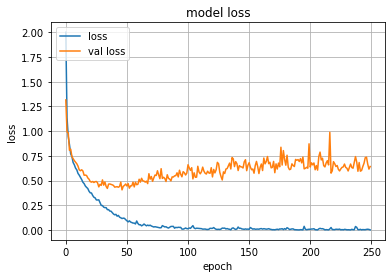

In [ ]:
plt.figure()
plt.plot(cnnhistory.history['loss'])
plt.plot(cnnhistory.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.grid(True)
plt.legend(['loss', 'val loss'], loc='upper left')
plt.show()

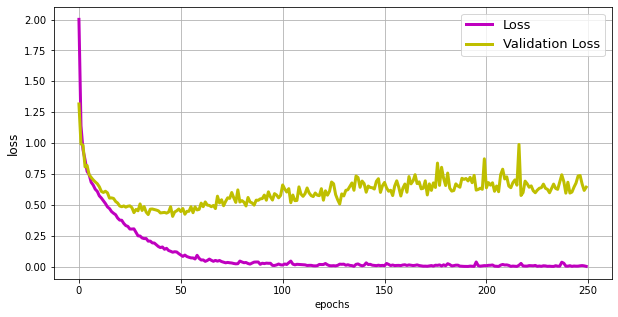

In [ ]:
plt.figure(figsize=(10,5))

plt.plot(cnnhistory.history['loss'], 'm', linewidth=3)
plt.plot(cnnhistory.history['val_loss'], 'y', linewidth=3)
plt.legend(['Loss', 'Validation Loss'], fontsize=13)
plt.xlabel('epochs')
plt.ylabel('loss', fontsize=12)
plt.grid(True)
plt.show()

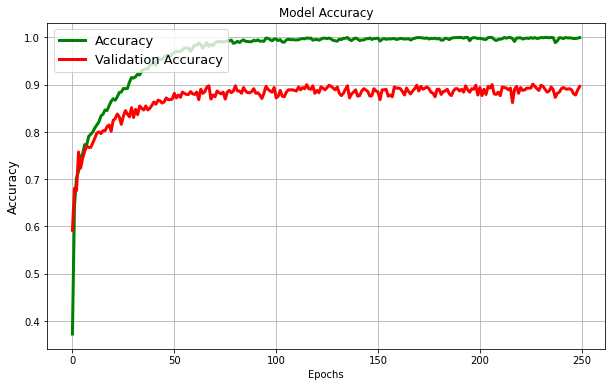

In [ ]:
plt.figure(figsize=(10,6), frameon=True)

plt.plot(cnnhistory.history['accuracy'], 'g', linewidth=3)
plt.plot(cnnhistory.history['val_accuracy'], 'r', linewidth=3)
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy', fontsize=12)

plt.legend(['Accuracy', 'Validation Accuracy'], loc = 'upper left', fontsize=13)
plt.grid(True)
plt.show()

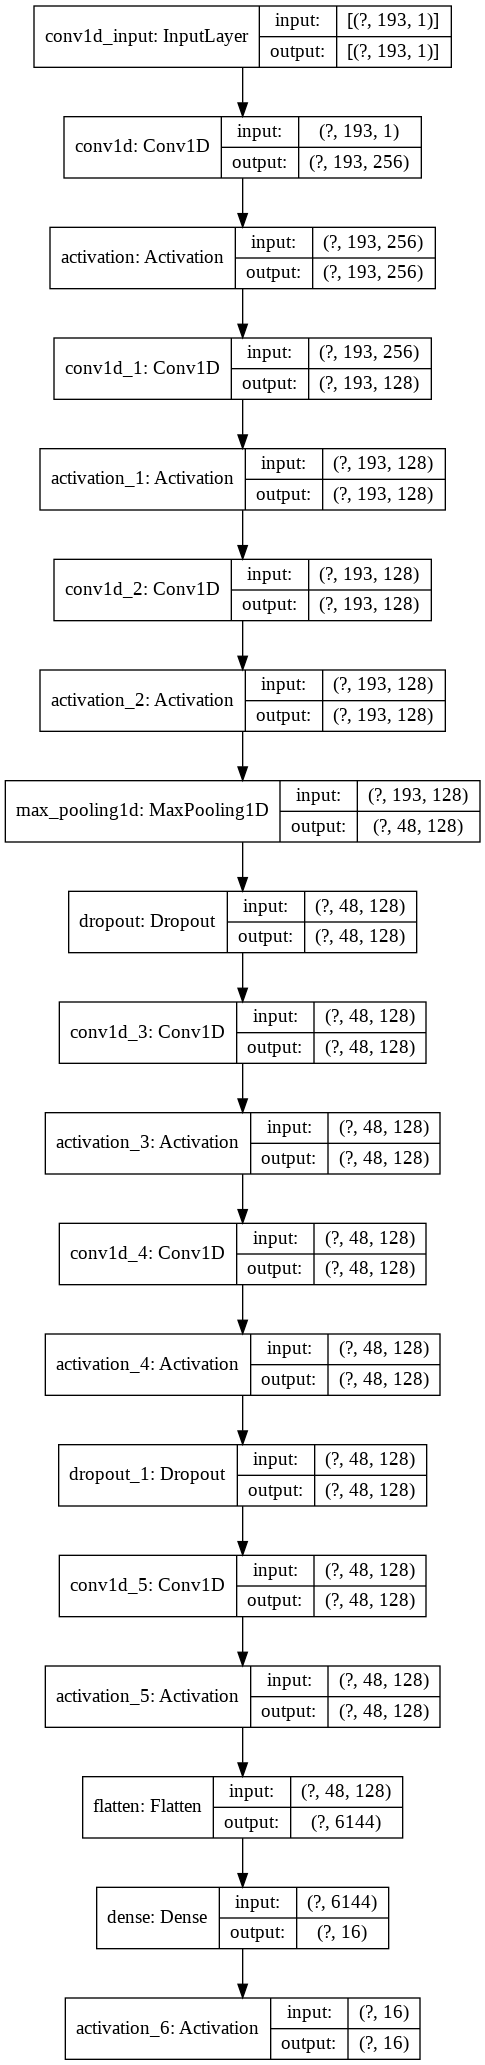

In [ ]:
tf.keras.utils.plot_model(
    model,
    to_file="img_model.png",
    show_shapes=False,
    show_layer_names=True,
    rankdir="TB",
    expand_nested=False,
    dpi=96,
)

dot_img_file = '/content/drive/My Drive/My_AI/img_model_06_RAVDESS&TESS.png'
tf.keras.utils.plot_model(model, to_file = dot_img_file, show_shapes=True)


SAVING THE MODEL

In [ ]:
model_name = 'Emotion_Voice_Detection_CNN_model_06_RAVDESS&TESS.h5'
path = '/content/drive/My Drive/My_AI/'
save_dir = os.path.join(os.getcwd(), 'saved_models')
# Save model and weights
if not os.path.isdir(save_dir):
    os.makedirs(save_dir)
model_path = os.path.join(save_dir, model_name)
model.save(model_path)
print('Saved trained model at %s ' % model_path)

Saved trained model at /content/saved_models/Emotion_Voice_Detection_CNN_model_06_RAVDESS&TESS.h5 


In [ ]:
import json
model_json = model.to_json()
with open("/content/drive/My Drive/My_AI/Voice-Emotion-Detector-master/model_06_RAVDESS&TESS.json", "w") as json_file:
    json_file.write(model_json)

LOADING THE MODEL

In [ ]:
# loading json and creating model
from keras.models import model_from_json
json_file = open('/content/drive/My Drive/My_AI/Voice-Emotion-Detector-master/model_06_RAVDESS&TESS.json', 'r')
loaded_model_json = json_file.read()
json_file.close()
loaded_model = model_from_json(loaded_model_json)
# load weights into new model
loaded_model.load_weights("/content/saved_models/Emotion_Voice_Detection_CNN_model_06_RAVDESS&TESS.h5")
print("Loaded model from disk")

# evaluate loaded model on test data
loaded_model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])
score = loaded_model.evaluate(x_testcnn, y_test, verbose=0)
print("%s: %.2f%%" % (loaded_model.metrics_names[1], score[1]*100))

Loaded model from disk
accuracy: 89.65%


Predicting emotions on the test data

In [ ]:
preds = loaded_model.predict(x_testcnn, batch_size=32, verbose=1)
preds1=preds.argmax(axis=1)

abc = preds1.astype(int).flatten()
predictions = (lb.inverse_transform((abc)))
preddf = pd.DataFrame({'predictedvalues': predictions})

actual=y_test.argmax(axis=1)

abc123 = actual.astype(int).flatten()
actualvalues = (lb.inverse_transform((abc123)))

actualdf = pd.DataFrame({'actualvalues': actualvalues})
finaldf = actualdf.join(preddf)

finaldf[10:70]

26/26 [==============================] - 2s 74ms/step


,actualvalues,predictedvalues
10,female_happy,female_happy
11,female_happy,female_happy
12,female_disgust,female_disgust
13,female_sad,female_sad
14,male_fearful,male_fearful
15,female_surprised,female_surprised
16,female_angry,female_angry
17,male_disgust,male_sad
18,male_calm,male_neutral
19,female_happy,female_happy


In [ ]:
finaldf.groupby('actualvalues').count()

,predictedvalues
actualvalues,
female_angry,92
female_calm,20
female_disgust,99
female_fearful,92
female_happy,99
female_neutral,89
female_sad,94
female_surprised,94
male_angry,16


In [ ]:
finaldf.groupby('predictedvalues').count()

,actualvalues
predictedvalues,
female_angry,92
female_calm,21
female_disgust,97
female_fearful,86
female_happy,107
female_neutral,95
female_sad,91
female_surprised,93
male_angry,15


In [ ]:
finaldf.to_csv('Predictions_RAV&TESS.csv', index=False)

In [ ]:
data, sampling_rate = librosa.load('/content/drive/My Drive/My_AI/RawData/03-01-08-02-02-02-21.wav')

% pylab inline
import os
import pandas as pd
import librosa
import glob 

plt.figure(figsize=(15, 5))
librosa.display.waveplot(data, sr=sampling_rate)

In [ ]:
X, sample_rate = librosa.load('/content/drive/My Drive/My_AI/RawData/03-01-08-02-02-02-21.wav', res_type='kaiser_fast',duration=2.5,sr=22050*2,offset=0.5)
sample_rate = np.array(sample_rate)

demo_file = os.fspath('/content/drive/My Drive/My_AI/RawData/03-01-08-02-02-02-21.wav')
features_live  = extract_feature(demo_file, mel=True, mfcc=True, contrast=True, chroma=True, tonnetz=True)

In [ ]:
features_live = pd.DataFrame(data = features_live)
features_live = features_live.stack().to_frame().T

In [ ]:
features_live_2d = np.expand_dims(features_live, axis=2)
live_preds = loaded_model.predict(features_live_2d, batch_size=32, verbose=1)
live_preds = live_preds.argmax(axis=1)
live_preds = live_preds.astype(int).flatten()

live_preds = (lb.inverse_transform((live_preds)))
live_preds